In [1]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics
from statistics import mode

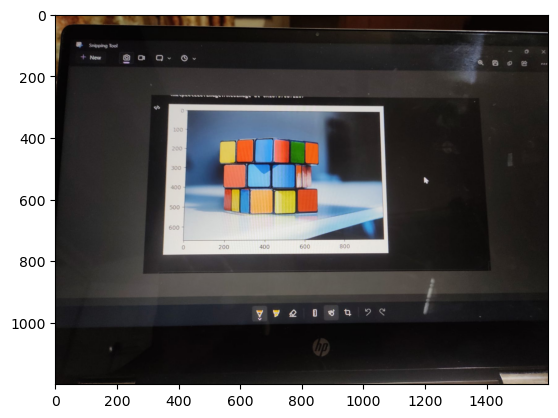

In [5]:
picofssBgr = cv2.imread('CubeObs/Green-10.jpg')
picofssRgb = cv2.cvtColor(picofssBgr, cv2.COLOR_BGR2RGB)
picofssHsv = cv2.cvtColor(picofssBgr, cv2.COLOR_BGR2HSV)
plt.imshow(picofssRgb)


In [6]:
lowerColor = np.array([40,100,0])
upperColor = np.array([95,255,255])
mask = cv2.inRange(picofssHsv, lowerColor, upperColor)
hue = picofssHsv[:,:,0]
saturation = picofssHsv[:,:,1]
value = picofssHsv[:,:,2]

modehue = mode(hue[mask > 0 ])

#Simply Reading mode to check if its closer than median
print("Mode Hue: ",modehue)

#medianSaturation = np.median(saturation[mask > 0])
#medianValue = np.median(value[mask > 0])
medianHue = np.median(hue[mask > 0])

# medianSaturation, medianValue after assessing I found aren't helpful
# SO WE"LL USE HUE
print("Median Hue: ",medianHue)

# # Bitwise-AND mask and original image
r = cv2.bitwise_and(picofssRgb,picofssRgb, mask= mask)

# # DISPLAYS MASK IN BNW
#cv2.imshow('Mask',mask)
#cv2.waitKey(0)

cv2.namedWindow("Masked", cv2.WINDOW_NORMAL)       
cv2.imshow('Masked',cv2.cvtColor(r, cv2.COLOR_RGB2BGR))
cv2.waitKey(0)
cv2.destroyAllWindows()

Mode Hue:  52
Median Hue:  52.0
